# 深度学习框架入门

作者：杨岱川

时间：2019年12月

github：https://github.com/DrDavidS/basic_Machine_Learning

开源协议：[MIT](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/LICENSE)

参考文献：

- 《深度学习入门》，作者：斋藤康毅；
- 《深度学习》，作者：Ian Goodfellow 、Yoshua Bengio、Aaron Courville。

## 承上启下

在之前的机器学习章节里，我们较为详细地讲述了常用的机器学习算法原理和应用，以及利用 Pandas 和 Scikit-Learn 库，也就是 SKLearn ，直接调用一些封装好的机器学习算法类（class），比如：

- $k$近邻算法：`sklearn.neighbors.KNeighborsClassifier`
- 决策树算法：`sklearn.tree.DecisionTreeClassifier`
- 朴素贝叶斯算法：`sklearn.naive_bayes.GaussianNB`
- 随机森林算法：`sklearn.ensemble.RandomForestClassifier`

等等。

可以说 SKlearn 是一个很优秀、很常用的 Python 机器学习库，其中不仅有各种封装好的机器学习算法，还有很多特征工程处理算法。

在[2.04 特征的统计学检查](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/机器学习基础/2.04%20特征的统计学检查.ipynb)中介绍了相关性系数和数据分布的统计方法，在[2.07 蘑菇分类实践](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/机器学习基础/2.07%20蘑菇分类实践.ipynb)中介绍了**数据探索性分析（Exploratory Data Analysis, EDA）**方法以及数据可视化方法。

此外，针对**特征工程（Feature Engineering）**，我们也在[2.09 数据的编码方法](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/机器学习基础/2.09%20数据的编码方法.ipynb)中简要介绍了特征数据的常见编码方法，比如：

- Label Encoding
- One-Hot Encoding
- 周期特征编码

等。

此外，我们也讨论了部分其他非深度学习的机器学习框架，比如 LightGBM、XGBoost、CatBoost 等，并且详细解读了 XGBoost 算法过程。这些框架在比赛领域和工业界受到了广泛的欢迎，其效果非常优秀且性能也很好，所以应用广泛。

在深度学习领域，当我们需要运用深度学习相关知识和各种神经元，比如各位可能听过的 CNN、RNN 之类的东西，搭建一个自己的神经网络结构的时候，SKLearn 可能就不太够用了（虽然 SKLearn 还是提供了一个很简单的[神经网络模型](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)）。

## 深度学习框架

既然 SKLearn 在深度学习阶段不太够用了，那么我们势必要选择一款（或者几款）深度学习框架来作为我们的主要学习工具。

当前（2019年12月）比较主流的，且仍然在维护的深度学习框架主要有：

- **TensorFlow 2.0**：大名鼎鼎的 TensorFlow 由谷歌开发与维护，是一款在工业界非常流行的老牌深度学习框架，以静态计算图为主。
- **PyTorch 1.3.1**：PyTorch 框架由 Facebook 开发与维护，吸收了前身 Torch 和 Caffee / Caffee 2 的优点，在学术界广受欢迎，在工业界也有后来居上的趋势，以动态计算图为主。
- **MXNet 1.5.1**：MXNet 是亚马逊（amazon）的深度学习主要框架，中国人李沐是其主要贡献者。
- **飞桨ddlePaddle 1.6.1**：飞桨是百度开发一款深度学习框架，属于较为年轻的深度学习框架。年轻就是优势，飞桨的功能较为完善，兼顾静态图与动态图，而且其优点之一就是文档有全中文版本。

至于选择哪一款框架完全看自己，可以自行去官网或者论坛了解一下各种框架的优点，然后再行比较选择。

# 神经网络

我们在[2.02 感知机基础](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%9F%BA%E7%A1%80/2.02%20%E6%84%9F%E7%9F%A5%E6%9C%BA%E5%9F%BA%E7%A1%80.ipynb)中学习过感知机。感知机是神经网络的基础，那么感知机和神经网络的差异在哪里？

## 从感知机到神经网络

如果用图来表示神经网络的话，如下图所示：

![img](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/back_up_images/NN_example01.png?raw=true)

我们把最左边的一列称为**输入层**，最右边的一列称为**输出层**，中间的一列称为**中间层**。中间层有时候也称为**隐藏层**。“隐藏”的意思就是，隐藏层的神经元（和输入输出层相比）肉眼看不见。另外我们把输入层到输出层依次称为第0层、第1层、第2层（和 Python 索引一致）。 

回顾一下感知机：

![img](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/back_up_images/%E6%84%9F%E7%9F%A5%E6%9C%BA.png?raw=true)

图中的感知机接受 $x_1$ 与 $x_2$ 两个输入信号，输出为 $y$，如果用方程组来表达图中的感知机：

$$
\large
y =
\begin{cases}
0, & (b+w_1x_1+w_2x_2 \le 0)  \\
1, & (b+w_1x_1+w_2x_2 \gt 0)
\end{cases}
$$

其中 $b$ 称为**偏置**，图中并没有画出来，它用于控制神经元被激活的容易程度（什么叫激活，后续会提到）；$w_1$ 和 $w_2$ 表示各个信号的**权重**，用于控制各个信号的重要性。

如果加上偏置，则如下图所示：

![img](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/back_up_images/%E6%84%9F%E7%9F%A5%E6%9C%BA%E7%9A%84%E5%81%8F%E7%BD%AE.png?raw=true)

此图添加了权重为 $b$ 的输入信号 1，故此感知机将 $x_1$、$x_2$、1 三个信号作为神经元的输入，将其各自权重相乘，传送至下一个神经元。在下一个神经元中，计算这些加权信号的总和，如果超过 0 ，则输出 1 ，否则输出 0 。 

为了简化上面的方程组，我们引入新函数 $h(x)$:

$$\large y=h(b+w_1x_1+w_2x_2)$$

$$
\large
h(x) =
\begin{cases}
0, & (x \le 0)  \\
1, & (x \gt 0)
\end{cases}
$$

在上式中，输入信号的总和就是 $h(x)$，转换后的值就是输出 $y$，同样的，输入如果超过 0 ，则输出 1 ，否则输出 0。

## 激活函数

刚刚的新函数 $h(x)$ 会将输入信号的总和转换为输出信号，这种函数就叫做**激活函数（activation function）**，其作用在于决定如何来激活输入信号的总和。

进一步改变一下这个式子，我们分两个阶段处理，先计算输入信号的加权总和，记为 $a$ ，然后用激活函数 $h(x)$ 来将总和 $a$ 转换为输出 $y$：

$$
\large
\begin{equation}\begin{split} 
a&=b+w_1x_1+w_2x_2 \\ 
y&=h(a)
\end{split}\end{equation}
$$

如图所示：

![img](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/back_up_images/%E6%98%8E%E7%A1%AE%E6%98%BE%E7%A4%BA%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0%E7%9A%84%E8%AE%A1%E7%AE%97%E8%BF%87%E7%A8%8B.png?raw=true)

这里的 $a$ 和 $y$ 也就神经元，或者我们也可以称之为节点，上图展示了激活函数的计算过程。

### sigmoid

神经网络中常用的激活函数之一就是 **sigmoid** 函数：

$$\large h(x)=\frac{1}{1+e^{-x}}$$

回忆一下在机器学习中，[2.08 逻辑回归的原理与应用](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%9F%BA%E7%A1%80/2.08%20%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92%E7%9A%84%E5%8E%9F%E7%90%86%E4%B8%8E%E5%BA%94%E7%94%A8.ipynb)讲过的逻辑回归的分布函数 $F(x)$，你会发现这两个函数长得一模一样。

回顾一下 sigmoid 曲线的样子：

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'  # 生成矢量图

In [7]:
def sigmoid(x):
    """定义sigmoid函数"""
    return 1.0/(1.0 + np.exp(-x))

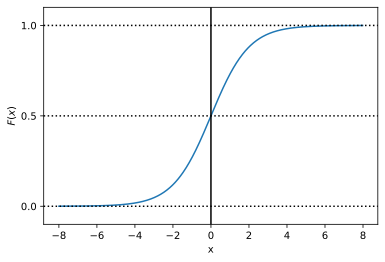

In [8]:
x = np.arange(-8, 8, 0.02)
plt.plot(x, sigmoid(x))

plt.axvline(0.0,color='k')
plt.axhline(y=0.0,ls='dotted',color='k')
plt.axhline(y=1.0,ls='dotted',color='k')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('$F(x)$')
# plt.savefig("pic001.png", dpi=600)  # 保存图片
plt.show()

这表示如果我们向 sigmoid 函数输入一个实数，就会有一个值被输出，比如 $h(1.0) = 0.731\cdots$、$h(2.0) = 0.880\cdots$ 等等。

事实上，感知机和神经网络的主要区别就在于**激活函数**，而其他方面，比如神经元多层连接的构造，信号的传递方法等，神经网络基本和感知机是一样的。

现在我们通过和阶跃函数的比较来详细学习作为激活函数的 sigmoid 函数。

### 阶跃函数

阶跃函数很好理解，它以 0 为界，输出从 0 切换到 1（或者反过来），它的值呈现阶梯式的变化，所以叫阶跃函数。

In [9]:
def step_function(x):
    """定义阶跃函数"""
    return np.array(x > 0, dtype=np.int)

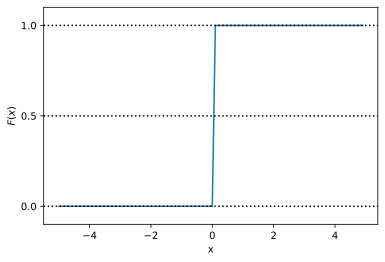

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, step_function(x))

plt.axhline(y=0.0,ls='dotted',color='k')
plt.axhline(y=1.0,ls='dotted',color='k')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('$F(x)$')
# plt.savefig("pic001.png", dpi=600)  # 保存图片
plt.show()

### sigmoid 与 阶跃函数 的比较

现在我们把 阶跃函数 和 sigmoid 函数合并起来比较一下：

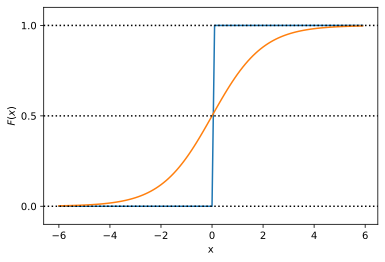

In [16]:
x = np.arange(-6.0, 6.0, 0.1)
plt.plot(x, step_function(x))
plt.plot(x, sigmoid(x))

plt.axhline(y=0.0,ls='dotted',color='k')
plt.axhline(y=1.0,ls='dotted',color='k')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('$F(x)$')
# plt.savefig("pic001.png", dpi=600)  # 保存图片
plt.show()

#### 不同之处

从图上可以看出，它们首先是“平滑性”不同。sigmoid 函数是一条平滑的曲线，而阶跃函数以 0 为界，输出发生急剧性的变化。

> sigmoid 函数的**平滑性**对神经网络的学习有重要的意义。

另外阶跃函数只能返回 0 或者 1，而sigmoid 函数可以返回 0 到 1 之间的实数。换句话说，感知机中的神经元之间流动的是 0 或者 1 的二元信号，而神经网络中流动的是连续的实值信号。

#### 相同之处

虽然 sigmoid 和 阶跃函数 在平滑性上有差异，但是从宏观视角来看，它们的形状是相似的（比如把上面的代码的输入范围扩展到正100到负100）。

下载并安装 TensorFlow 2.0 。将 TensorFlow 载入你的程序：

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

载入并准备好 MNIST 数据集。将样本从整数转换为浮点数：

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 3s 0us/step


将模型的各层堆叠起来，以搭建 `tf.keras.Sequential` 模型。为训练选择优化器和损失函数：

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

训练并验证模型：

In [4]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2977 - accuracy: 0.9140
Epoch 2/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1425 - accuracy: 0.9577
Epoch 3/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1063 - accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0881 - accuracy: 0.9728
Epoch 5/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0725 - accuracy: 0.9775
10000/1 - 0s - loss: 0.0354 - accuracy: 0.9773


[0.06881703766956926, 0.9773]